In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [6]:
df=pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
print(df.head())
df.tail()

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Here we will be experimenting with 3 algorithms 
1. KNeighborsClassifier
2. DecisionTreeClassifier
3. RandomForestClassifier

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Feature Selection

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

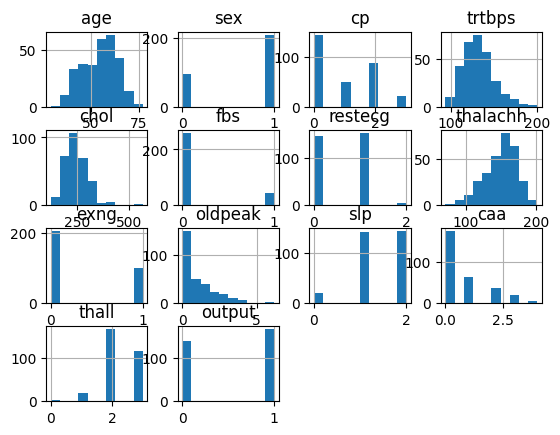

In [12]:
df.hist()

<Axes: xlabel='output', ylabel='count'>

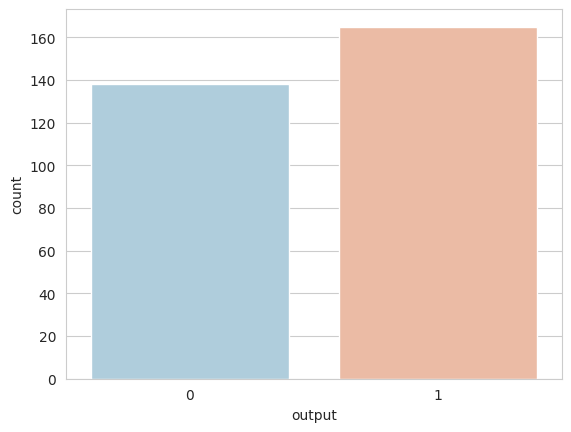

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='output',data=df,palette='RdBu_r')

# Data Processing
After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models.
First, I'll use the `get_dummies` method to create dummy columns for categorical variables.

In [14]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'])
dataset = dataset.astype(int) 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [16]:
dataset.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,cp_0,cp_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,0.952197,0.763956,-0.256334,0.015443,1.154475,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.089785,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.219165,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.716145,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.716145,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [17]:
y = dataset['output']
X = dataset.drop(['output'], axis = 1)

In [28]:
print(X),print(y)

          age    trtbps      chol  thalachh   oldpeak  sex_0  sex_1  cp_0  \
0    0.952197  0.763956 -0.256334  0.015443  1.154475      0      1     0   
1   -1.915313 -0.092738  0.072199  1.633471  2.089785      0      1     0   
2   -1.474158 -0.092738 -0.816773  0.977514  0.219165      1      0     0   
3    0.180175 -0.663867 -0.198357  1.239897 -0.716145      0      1     0   
4    0.290464 -0.663867  2.082050  0.583939 -0.716145      1      0     1   
..        ...       ...       ...       ...       ...    ...    ...   ...   
298  0.290464  0.478391 -0.101730 -1.165281 -0.716145      1      0     1   
299 -1.033002 -1.234996  0.342756 -0.771706  0.219165      0      1     0   
300  1.503641  0.706843 -1.029353 -0.378132  2.089785      0      1     1   
301  0.290464 -0.092738 -2.227533 -1.515125  0.219165      0      1     1   
302  0.290464 -0.092738 -0.198357  1.064975 -0.716145      1      0     0   

     cp_1  cp_2  ...  slp_2  caa_0  caa_1  caa_2  caa_3  caa_4  thall_0  \


(None, None)

# KNN

In [19]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

In [20]:
print(len(knn_scores))
knn_scores

20


[0.7589247311827958,
 0.7625806451612903,
 0.8249462365591398,
 0.8050537634408602,
 0.8313978494623656,
 0.8413978494623656,
 0.8479569892473119,
 0.8482795698924731,
 0.8413978494623656,
 0.8447311827956989,
 0.8379569892473118,
 0.8280645161290323,
 0.8348387096774192,
 0.8481720430107528,
 0.8348387096774192,
 0.8316129032258065,
 0.8381720430107527,
 0.8349462365591398,
 0.8381720430107527,
 0.8447311827956989]

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

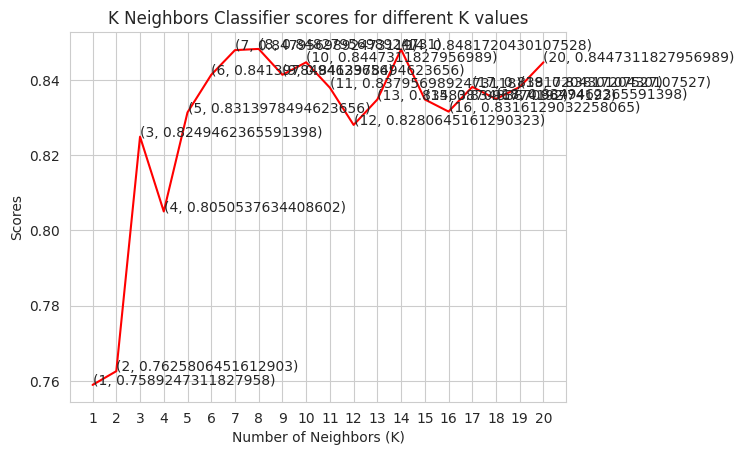

In [21]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [22]:
knn_classifier = KNeighborsClassifier(n_neighbors = 8)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [23]:
score.mean()

0.8482795698924731

# Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [26]:
score.mean()

0.8282795698924732

# Decision tree

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [34]:
print(X_train),print(y_train)

          age    trtbps      chol  thalachh   oldpeak  sex_0  sex_1  cp_0  \
37  -0.040403  1.049520 -0.275659  0.671400  0.219165      0      1     0   
16   0.400752 -0.663867  1.811493  0.977514 -0.716145      1      0     0   
126 -0.812425 -1.120770 -0.816773 -0.290671 -0.716145      0      1     1   
291  0.400752 -1.006544  1.386332 -0.421862  3.025095      0      1     1   
273  0.400752 -1.806125 -0.237008  0.277826 -0.716145      0      1     1   
..        ...       ...       ...       ...       ...    ...    ...   ...   
188 -0.481558  0.478391 -0.256334  0.583939 -0.716145      0      1     0   
71  -0.371269 -2.148802 -0.372287  0.190365 -0.716145      0      1     0   
106  1.613930  1.620649 -0.237008 -0.815437 -0.716145      0      1     0   
270 -0.922713 -0.663867  0.052874 -0.246940 -0.716145      0      1     1   
102  0.952197  0.478391 -0.990702  1.283627 -0.716145      1      0     0   

     cp_1  cp_2  ...  slp_2  caa_0  caa_1  caa_2  caa_3  caa_4  thall_0  \


(None, None)

In [45]:
from sklearn.tree import DecisionTreeClassifier
##postpruning
treemodel=DecisionTreeClassifier(max_depth=4)
treemodel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

ploting the made tree

[Text(0.49107142857142855, 0.9, 'x[21] <= 0.5\ngini = 0.499\nsamples = 203\nvalue = [96, 107]'),
 Text(0.26785714285714285, 0.7, 'x[7] <= 0.5\ngini = 0.332\nsamples = 81\nvalue = [64, 17]'),
 Text(0.14285714285714285, 0.5, 'x[19] <= 0.5\ngini = 0.5\nsamples = 33\nvalue = [17, 16]'),
 Text(0.07142857142857142, 0.3, 'x[22] <= 0.5\ngini = 0.401\nsamples = 18\nvalue = [5, 13]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.21428571428571427, 0.3, 'x[0] <= 0.787\ngini = 0.32\nsamples = 15\nvalue = [12, 3]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.25, 0.1, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.39285714285714285, 0.5, 'x[6] <= 0.5\ngini = 0.041\nsamples = 48\nvalue = [47, 1]'),
 Text(0.35714285714285715, 0.3, 'x[2] <= 1.009\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.32142857142857145, 0.1, 'gini = 0.0\ns

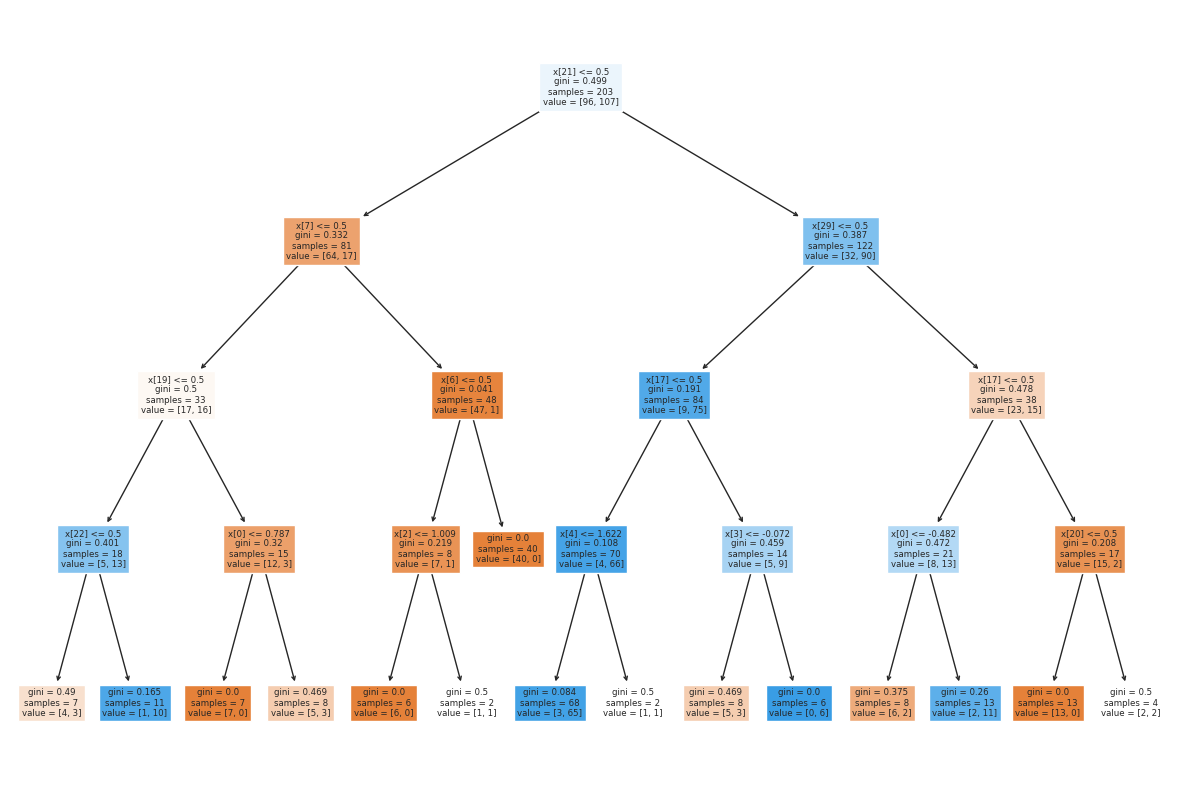

In [ ]:
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [49]:
#prediction
y_pred=treemodel.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0])

In [50]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)

0.75


In [51]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.66      0.74        53
           1       0.69      0.85      0.76        47

    accuracy                           0.75       100
   macro avg       0.76      0.76      0.75       100
weighted avg       0.77      0.75      0.75       100



# **Preprunning of Decision tree**

In [52]:
## Preprunning
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [53]:
from sklearn.model_selection import GridSearchCV

In [55]:
treemodel=DecisionTreeClassifier()
cv=GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')

In [56]:
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [57]:
cv.best_params_

{'criterion': 'log_loss',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'random'}

In [58]:
y_pred=cv.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
score=accuracy_score(y_pred,y_test)
score

0.75

In [59]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.64      0.73      0.68        37
           1       0.83      0.76      0.79        63

    accuracy                           0.75       100
   macro avg       0.74      0.75      0.74       100
weighted avg       0.76      0.75      0.75       100

